# <span style="color:Blue"> Pretraitement des donnees:</span>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull, convex_hull_plot_2d

### *Importation de la data :* 

In [79]:
raw_X = pd.read_excel('Eleves_2_départements.xlsx', index_col=1,header=6,usecols="A:AB",nrows=102, engine='openpyxl')  

In [80]:
raw_X.drop(['Académie'], axis=1,inplace=True)
Total = raw_X.iloc[-1]
raw_X.drop(raw_X.index[-1],axis=0,inplace=True)

In [81]:
raw_X.head(5)

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ain,46397.0,46612.0,46860.0,47117.0,47533.0,47595.0,47381.0,47484.0,47762.0,47672.0,...,48641.0,49287,49294,49794,50698,51493,52084,53306,54097,55160
Aisne,57570.0,57608.0,57226.0,57262.0,56867.0,56019.0,54670.0,53589.0,52651.0,51705.0,...,46361.0,46608,46476,46478,46553,46568,46747,46781,46646,46505
Allier,30712.0,29770.0,29171.0,28603.0,27950.0,27361.0,26868.0,26361.0,26019.0,25802.0,...,24295.0,24300,24575,24632,24448,24196,24273,24276,24213,24158
Alpes-de-Haute-Provence,11990.0,12086.0,12190.0,12311.0,12535.0,12750.0,12894.0,12820.0,12991.0,13197.0,...,12931.0,13310,13124,13339,13241,13240,13138,13005,12944,12698
Alpes-Maritimes,79161.0,79137.0,79668.0,80351.0,81060.0,82112.0,83105.0,84656.0,86355.0,87177.0,...,84921.0,84126,84298,84791,84793,84863,85294,85812,86040,87333


In [82]:
# Extraction des départements et des années
years = np.array(list(map(int, raw_X.columns.values)))

* On plot le nombre total d'effectif des élèves du secondaire. Cependant, il prendre en compte que l'échelle reste petite. L'effectif total reste environ le même entre 1994 et 2019.  

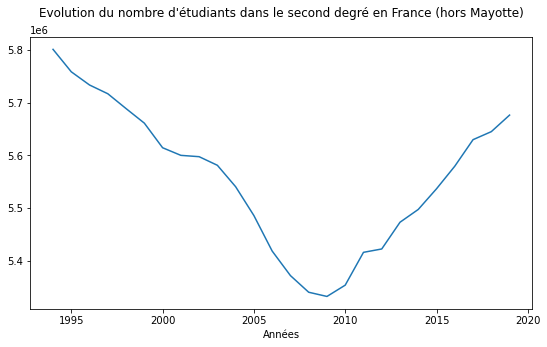

In [83]:
#Total du nombres d'élèves
plt.figure(figsize=(9, 5))
plt.title("Evolution du nombre d'étudiants dans le second degré en France (hors Mayotte)",pad=20)
plt.xlabel('Années')
plt.plot(years,Total.values)

In [84]:
#Analyse descriptives
raw_X.describe()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,...,100.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,58014.53000,57587.540000,57336.770000,57170.610000,56888.430000,56611.77000,56144.270000,55999.520000,55974.070000,55810.520000,...,53532.160000,53619.673267,53683.039604,54185.960396,54427.079208,54816.019802,55241.128713,55740.306931,55891.267327,56202.801980
std,46295.05464,46250.049733,46099.584548,46059.749521,45879.089977,45719.04209,45353.299288,45199.623933,45109.573749,44949.187392,...,42521.972811,42532.904000,42482.730144,42872.315815,43153.750031,43558.435821,44005.355776,44572.448947,44899.587186,45361.516645
min,7704.00000,7522.000000,7312.000000,7341.000000,7276.000000,7177.00000,7026.000000,6897.000000,6852.000000,6898.000000,...,6579.000000,6507.000000,6549.000000,6644.000000,6563.000000,6480.000000,6433.000000,6448.000000,6390.000000,6356.000000
25%,26147.00000,25802.750000,25792.500000,25573.250000,25393.750000,25236.75000,25150.750000,25192.000000,24949.750000,24474.250000,...,23896.250000,24114.000000,24007.000000,24304.000000,24380.000000,24196.000000,24273.000000,24276.000000,24213.000000,24158.000000
50%,47780.00000,47199.500000,47192.000000,47185.000000,47659.000000,47733.50000,47120.000000,46647.500000,46215.500000,45936.500000,...,42296.000000,41913.000000,41849.000000,42228.000000,42270.000000,42441.000000,42564.000000,43361.000000,44322.000000,44817.000000
75%,75755.00000,75149.750000,74182.000000,73903.000000,74581.500000,76082.50000,76666.250000,76117.500000,75693.250000,74945.000000,...,70604.250000,70920.000000,71392.000000,72160.000000,72402.000000,73017.000000,73300.000000,73430.000000,73171.000000,72928.000000
max,293612.00000,293743.000000,291022.000000,289593.000000,286513.000000,283414.00000,277974.000000,273235.000000,268938.000000,264627.000000,...,234815.000000,234591.000000,233537.000000,234578.000000,235557.000000,236670.000000,237244.000000,238800.000000,239000.000000,239138.000000


In [85]:
raw_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, Ain to La Réunion
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1994    100 non-null    float64
 1   1995    100 non-null    float64
 2   1996    100 non-null    float64
 3   1997    100 non-null    float64
 4   1998    100 non-null    float64
 5   1999    100 non-null    float64
 6   2000    100 non-null    float64
 7   2001    100 non-null    float64
 8   2002    100 non-null    float64
 9   2003    100 non-null    float64
 10  2004    100 non-null    float64
 11  2005    100 non-null    float64
 12  2006    100 non-null    float64
 13  2007    100 non-null    float64
 14  2008    100 non-null    float64
 15  2009    100 non-null    float64
 16  2010    100 non-null    float64
 17  2011    101 non-null    int64  
 18  2012    101 non-null    int64  
 19  2013    101 non-null    int64  
 20  2014    101 non-null    int64  
 21  2015    101 non-null    int64  
 22

* On applique l'objet StandardScaler afin de centrer et réduire. On a fait le choix de normaliser chaque individu (série temporelle).

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Nous effectuons un centrage des 

In [178]:
sc = StandardScaler()

#Centrage et réduction des séries temporelles des départements
X = sc.fit_transform(raw_X.T).T
X = pd.DataFrame(X)
X.set_index(raw_X.index,inplace=True)
X.columns = years

La série du département de la Mayotte est la seule à commencer en 2011. Les données des années précédentes sont manquantes. Nous avons considéré que l'évolution de 2011 à 2019 n'était pas suffisament réprésentatif pour être comparé directement avec les autres séries.

Nous avons penser à remplacer les valeurs manquantes par la moyenne de chaque année pour la Mayotte. Cependant, nous pensons que cela n'a pas de sens concret de réprésenter l'évolution de l'effectif de la Mayotte par les autres départements.
Nous avons donc extrait et supprimer cette série de notre dataframe pour le moment. Nous essayerons de la comparer avec les clusters obtenus par la suite.

In [88]:
#Extraction du cas de la Mayotte (données manquantes)
Mayotte = X.loc['Mayotte']
X.drop(['Mayotte'], axis=0,inplace=True)
departements = X.index.values

<span style="color:Blue"> Méthode du coude et le choix du nombre de composantes :</span>

In [89]:
# Application de l'analyse en composantes principales sur l'ensemble des données (hors Mayotte)
pca = PCA(svd_solver='full')
X_pca = pca.fit_transform(X)

In [90]:
print("Valeurs propres :",pca.explained_variance_)
print("Ratio de variance expliquée :",pca.explained_variance_ratio_) 
print("Somme cumulée des ratios de variance expliquée :", np.cumsum(pca.explained_variance_ratio_)) 


Valeurs propres : [1.34791773e+01 3.91276597e+00 1.54090420e+00 4.15961990e-01
 2.37010298e-01 4.63390770e-02 3.70300070e-02 2.42426990e-02
 1.93295517e-02 1.49313886e-02 1.27296822e-02 1.15930153e-02
 9.14204095e-03 7.44761696e-03 6.14932496e-03 4.52121570e-03
 3.53237316e-03 2.59984341e-03 2.54302221e-03 2.03063661e-03
 1.93349625e-03 1.49598446e-03 1.27309370e-03 1.16579464e-03
 7.75726857e-04 2.58601396e-29]
Ratio de variance expliquée : [6.80882578e-01 1.97648129e-01 7.78367106e-02 2.10117625e-02
 1.19722576e-02 2.34075638e-03 1.87052118e-03 1.22458745e-03
 9.76406400e-04 7.54239087e-04 6.43022838e-04 5.85605631e-04
 4.61797947e-04 3.76206390e-04 3.10624910e-04 2.28383152e-04
 1.78433096e-04 1.31327606e-04 1.28457359e-04 1.02574887e-04
 9.76679720e-05 7.55676501e-05 6.43086221e-05 5.88885541e-05
 3.91848026e-05 1.30629029e-30]
Somme cumulée des ratios de variance expliquée : [0.68088258 0.87853071 0.95636742 0.97737918 0.98935144 0.99169219
 0.99356272 0.9947873  0.99576371 0.9965

* On représente le ratio cummulé de variance expliqué. Lorsque l'on plot le ratio de variance expliqué (soit l’inertie). D'après la règle du coude on sélectionne alors 3 axes. Ainsi, on explique 95% de l'inertie totale. On ne sélectionne pas le 4ème axe car il n'apporte que trop peu d'information et la représentation serait difficile. 

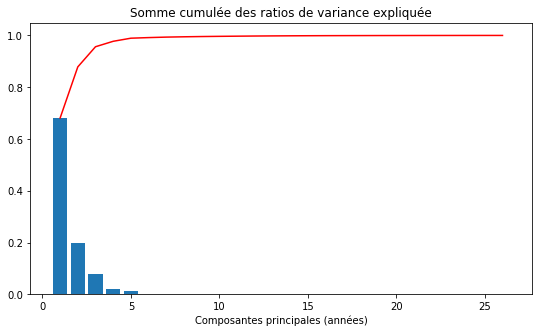

In [91]:
ycum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(9, 5))
plt.title("Somme cumulée des ratios de variance expliquée")
plt.xlabel('Composantes principales (années)')
plt.bar(range(1,X.shape[1]+1),pca.explained_variance_ratio_)
plt.plot(range(1,X.shape[1]+1),ycum,"-r")
plt.show()

#### Affichage des 3 premières composantes en fonction des années

Text(0.5, 15.0, 'Années')

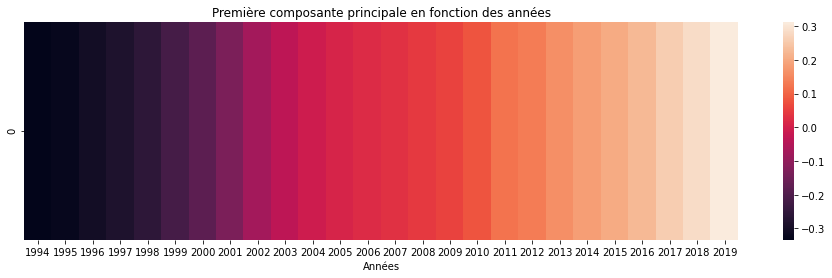

In [92]:
# Affichage de la première composante principale en fonction des années
plt.figure(figsize=(16, 4))
fig = sns.heatmap(pca.components_[0:1],xticklabels=X.columns).set_title("Première composante principale en fonction des années")
plt.xlabel("Années")

* Cette heatmap permet de représenter la combinaison linéaire de la première composante principale par rapport aux années. On observe que la première composante princiaple permet de montrer une croissante ou décroissante stable de 1994 à 2019. Les départements bien représentés par cet axe possèdent une croissance ou décroissance de l'effectif du nombre d'élèves dans le second degré entre 1994 et 2019.

Text(0.5, 15.0, 'Années')

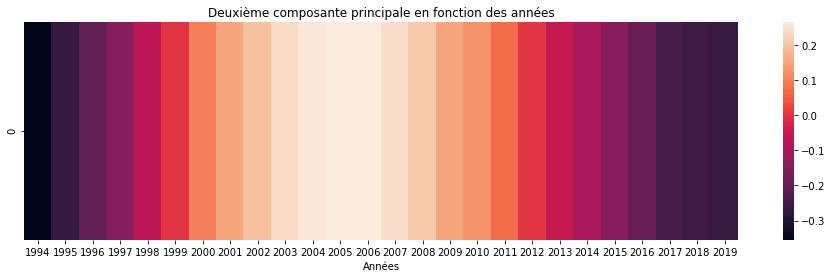

In [93]:
# Affichage de la deuxième composante principale en fonction des années
plt.figure(figsize=(16, 4))
fig = sns.heatmap(pca.components_[1:2,:],xticklabels=X.columns).set_title("Deuxième composante principale en fonction des années")
plt.xlabel("Années")

* Cette deuxième heatmap permet de représenter la combinaison linéaire de la deuxième composante principale par rapport aux années. Cette composante réprésente particulièrement les départements avec un maximum (ou un minimium local) du nombre d'élève dans le secondaire sur la période 2003 – 2007. Les séries bien représentées par cet axe se caractérisent aussi par une forte augmentation (ou diminution) du nombre d'élèves sur la période 1994-2005. 


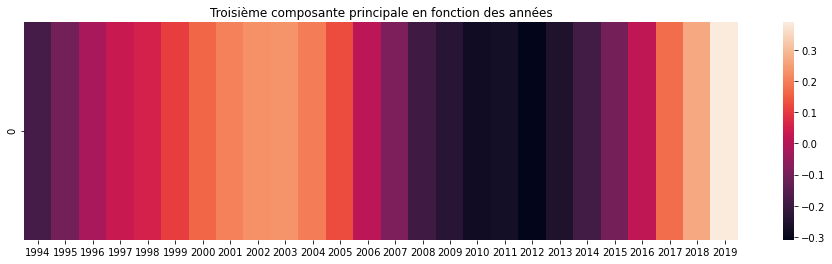

In [94]:
plt.figure(figsize=(16, 4))
plt.xlabel("Années")
fig = sns.heatmap(pca.components_[2:3,:],xticklabels=X.columns).set_title("Troisième composante principale en fonction des années")

* Cette heatmap représente la combinaison linéaire de la troisième composante principale par rapport aux années. Cette troisième composante "capture" les départements ayant un maximum local (ou minimum) du nombre d'élèves scolarisés dans le secondaire entre 2000 et 2005 puis un minimum (respectivement maximum) globale entre 2010 et 2014, suivi d'une forte augmentation (diminution) jusqu'en 2019. 

#### Affichage du cerle de corrélation (premier plan factoriel)

In [95]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns

def biplot(x=None,y=None,score=None,coeff=None,coeff_labels=None,score_labels=None,circle='T',bigdata=1000,cat=None,cmap="Set1",density=True,years=None):
    """
    Affichage du cercle de corrélation
    """
    if score is not None : x = score
    if x.shape[1]>1 :
        xs = x[:,0]
        ys = x[:,1]
    else :
        xs = x
        ys = y
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    temp = (xs - xs.min())
    x_c = temp / temp.max() * 2 - 1
    temp = (ys - ys.min())
    y_c = temp / temp.max() * 2 - 1
    if cat is None : cat = [0]*len(xs)
    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat))*len(xs)
    cat = pd.Series(cat).astype("category")
    fig = plt.figure(figsize=(6,6),facecolor='w') 
    ax = fig.add_subplot(111)
    # Affichage des points
    if (len(xs) < bigdata) :   
        ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)
    else :
        #color
        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))
        cmap = cmap
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        if density==True :
            sns.set_style("white")
            sns.kdeplot(x_c,y_c)
            sns.kdeplot(x_c,y_c, cmap="Blues", shade=True, shade_lowest=True, )
        for cat_temp in cat.cat.codes.unique() :
            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]
            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]
            points = [ [ None ] * len(x_c_temp) ] * 2
            points = np.array(points)
            points = points.reshape(len(x_c_temp),2)
            points[:,0] = x_c_temp
            points[:,1] = y_c_temp
            hull = ConvexHull(points)
            temp = 0
            for simplex in hull.simplices:
                color_temp = m.to_rgba(cat_temp)
                plt.plot(points[simplex, 0], points[simplex, 1],color=color_temp)#, linestyle='dashed')#linewidth=2,color=cat)
                if (temp == 0) :
                     plt.xlim(-1,1)
                     plt.ylim(-1,1)
                     temp = temp+1
    if coeff is not None :
        if (circle == 'T') :
            x_circle = np.linspace(-1, 1, 100)
            y_circle = np.linspace(-1, 1, 100)
            X, Y = np.meshgrid(x_circle,y_circle)
            F = X**2 + Y**2 - 1.0
            #fig, ax = plt.subplots()
            plt.contour(X,Y,F,[0])
        n = coeff.shape[0]
        for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,
                      head_width=0.05, head_length=0.05)
            if coeff_labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(years[i]), color = 'g', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')
        if score_labels is not None :
            for i in range(len(score_labels)) :
                temp_x = xs[i] * scalex
                temp_y = ys[i] * scaley
                plt.text(temp_x,temp_y,list(score_labels)[i])
                
    plt.title("Cercle de corrélation")
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(linestyle='--')

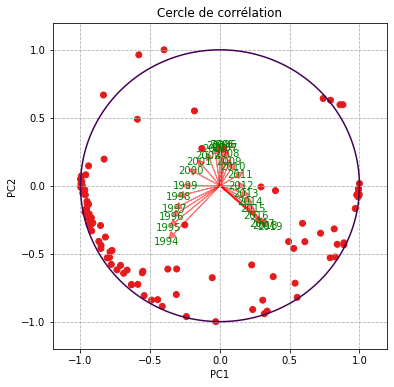

In [96]:
biplot(score=X_pca[:,0:2],coeff=np.transpose(pca.components_[0:2]),years=years)
plt.show()

Voici le cercle de corrélation sur le premier plan factoriel associé à l'ACP des départements par rapport aux années. On remarque les années consécutives sont très corrélées entre elles. En effet, le nombre d'élèves dans le secondaire d'un département à l'année X+1 est lié à celui à l'année X et ainsi de suite.

Comme nous l'avons vu précedemment, on voit que la première composante principale est une combinaison linéaire des années avec des coefficents croissants (de -0.3 environ pour l'année 1994 à environ 0.3 pour l'année 2019). 

La deuxième composante principale réprésente particulièrement les départements avec une croissance (respectivement décroissance) de l'effectif de 1994 à 2000, puis un maximum (respectivement minimum) de l'effectif vers 2005 puis une décroissance jusqu'en 2019.

In [97]:
# Contribution des individus dans l'inertie totale
Z = sc.fit_transform(X)
Z = pd.DataFrame(Z)
Z.set_index(X.index,inplace=True)
Z.columns = years

pca_ = PCA(svd_solver='full')
Z_pca = pca_.fit_transform(Z)

di = np.sum(Z**2,axis=1)
D = pd.DataFrame({'ID':Z.index,'d_i':di})

In [98]:
# Contributions des individus aux axes
Z_pca2 = Z_pca**2
for j in range(len(years)):
    Z_pca2[:,j] = Z_pca2[:,j]/(len(departements)*pca_.explained_variance_[j])

Contrib_axes = pd.DataFrame({'Axe 1':Z_pca2[:,0],'Axe 2':Z_pca2[:,1],'Axe 3':Z_pca2[:,2]})
print(Contrib_axes['Axe 1'].describe())
print(Contrib_axes['Axe 2'].describe())
print(Contrib_axes['Axe 3'].describe())

count    100.000000
mean       0.009900
std        0.010127
min        0.000007
25%        0.003565
50%        0.006856
75%        0.009373
max        0.039446
Name: Axe 1, dtype: float64
count    1.000000e+02
mean     9.900000e-03
std      1.579772e-02
min      2.330519e-07
25%      7.791091e-04
50%      3.766022e-03
75%      1.253773e-02
max      8.984165e-02
Name: Axe 2, dtype: float64
count    100.000000
mean       0.009900
std        0.016720
min        0.000001
25%        0.000869
50%        0.002979
75%        0.009281
max        0.086449
Name: Axe 3, dtype: float64


Voici les résumés des contributions des individus à chacun des 3 axes principaux. On peut ainsi voir la part prise par les départements dans la détermination des composantes prinpales. On remarque qu'il n'y a pas de département qui sur-représente un axe.

In [99]:
# Qualité de représentation des individus - COS2
Z_pca2 = Z_pca**2
for j in range(X.shape[1]):
    Z_pca2[:,j] = Z_pca2[:,j]/di

Cos = pd.DataFrame({'id':X.index,'COS² CP1':Z_pca2[:,0],'COS² CP2':Z_pca2[:,1],'COS² CP3':Z_pca2[:,2]})

Cos.loc[np.array(Cos['COS² CP1']>0.9) & np.array(Cos['COS² CP2']<0.1) & np.array(Cos['COS² CP3']<0.1)]

,id,COS² CP1,COS² CP2,COS² CP3
0,Ain,0.918697,0.025146,0.000016
1,Aisne,0.944314,0.017194,0.017705
8,Aube,0.919802,0.000019,0.023386
20,Côte d'Or,0.922712,0.014823,0.012985
31,Gard,0.919480,0.047633,0.009849
33,Gironde,0.938996,0.040097,0.003123
35,Haute-Garonne,0.906246,0.045787,0.031843
40,Haute-Savoie,0.961753,0.017233,0.004278
45,Hérault,0.931271,0.062037,0.001413
51,Landes,0.940588,0.015620,0.040033


Nous avons aussi observé la qualité de représentation de chaque département par chacun des 3 axes principaux. Ci-dessus figure des départements particulièrement bien représentés par la première composante principale (>0.9) et peu représentés par les autres (<0.1). 

In [100]:
Cos.loc[np.array(Cos['COS² CP1']<0.1) & np.array(Cos['COS² CP2']>0.9) & np.array(Cos['COS² CP3']<0.1)]

,id,COS² CP1,COS² CP2,COS² CP3
23,Deux-Sèvres,0.000690,0.969651,0.014236
38,Hautes-Alpes,0.029882,0.944583,0.002851
59,Maine-et-Loire,0.039852,0.946603,0.006003
65,Morbihan,0.030763,0.948279,0.014734


Ci-dessus figure des départements particulièrement bien représentés par la deuxième composante principale (>0.9) et peu représentés par les autres (<0.1). 

In [101]:
Cos.loc[np.array(Cos['COS² CP1']<0.3) & np.array(Cos['COS² CP2']<0.3) & np.array(Cos['COS² CP3']>0.5)]

,id,COS² CP1,COS² CP2,COS² CP3
79,Savoie,0.085738,0.057957,0.572066
82,Seine-Saint-Denis,0.268592,0.001386,0.573532
88,Val-d'Oise,0.231808,0.000007,0.696277


La troisième composante capture un maximum (respectivement minimum) entre 2000 et 2005, suivi d'un minimum (respectivement maximum) entre 2010 et 2014. Ci-dessus figure des départements particulièrement bien représentés par la troisième composante principale (>0.5) et peu moins représentés par les autres (<0.3).

Le Val d'Oise est un exemple de département bien représenté par la troisième composante principale. On peut supposer que ce département présente un maximum local du nombre d'élèves scolarisés dans le secondaire entre 2000 et 2005 puis un minimum globale entre 2010 et 2014, suivi d'une forte augmentation (diminution) jusqu'en 2019. 

In [102]:
def plot_PCA(X,axis,labels,title='',size=(13,13),group=None,polygon=False): 
    """
    Fonction d'affichage des points du nuage projectés sur un plan factoriel formé par
    2 composantes principales (axis)
    """
    
    fig, ax = plt.subplots(figsize=size) 
    plt.title(title)
    plt.xlabel('Composante principale '+str(axis[0]+1))
    plt.ylabel('Composante principale '+str(axis[1]+1))
    ax.axhline(y=0, color='k'),ax.axvline(x=0, color='k')
    plt.scatter(X[:,axis[0]],X[:,axis[1]],c=group, marker='o') 
    for i in range(len(X)): #plot each point + it's index as text above
        ax.annotate(labels[i], (X[i,axis[0]], X[i,axis[1]]),color='r')
        
    if not(group is None) and polygon:
        for i in list(np.unique(group)):
            idx = np.where(group==i)[0].tolist()
            points_in_group = np.vstack((X[idx,axis[0]],X[idx,axis[1]])).T    
            if len(points_in_group)>2:
                hull = ConvexHull(points_in_group)
                for simplex in hull.simplices:                 
                    ax.plot(points_in_group[simplex, 0], points_in_group[simplex, 1], 'k')
            
    plt.show()

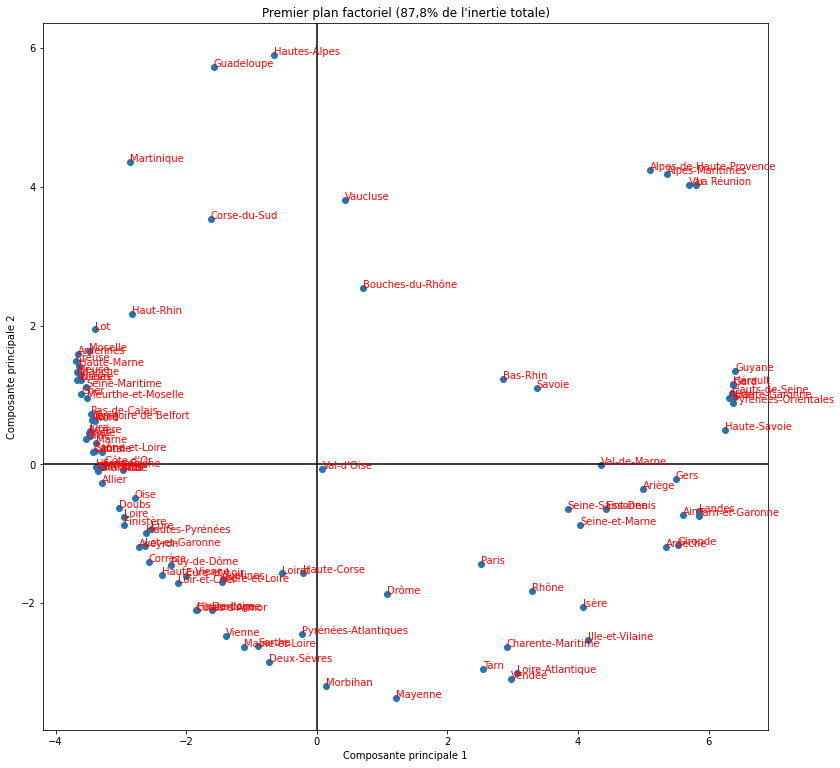

In [103]:
plot_PCA(X_pca,[0,1],departements,'Premier plan factoriel (87,8% de l\'inertie totale)')

Ci-dessus figure la projection des départements sur le premier plan factoriel formé par les deux premières composantes principales. Cette projection explique 87,8% de l'inertie totale. On remarque que sur cette projection, certains départements forment des clusters avec une inertie intra-classe faible.

Par exemple, on remarque un groupe (Guyanne, Hérault, Haute-Savoie, Pyrénées-Orientalles, Hauts-de Seines) assez bien représenté par la première composante. Ces départements ont en commun le fait qu'ils possèdent un effectif d'élèves dans le secondaire croissant de 1994 à 2019.

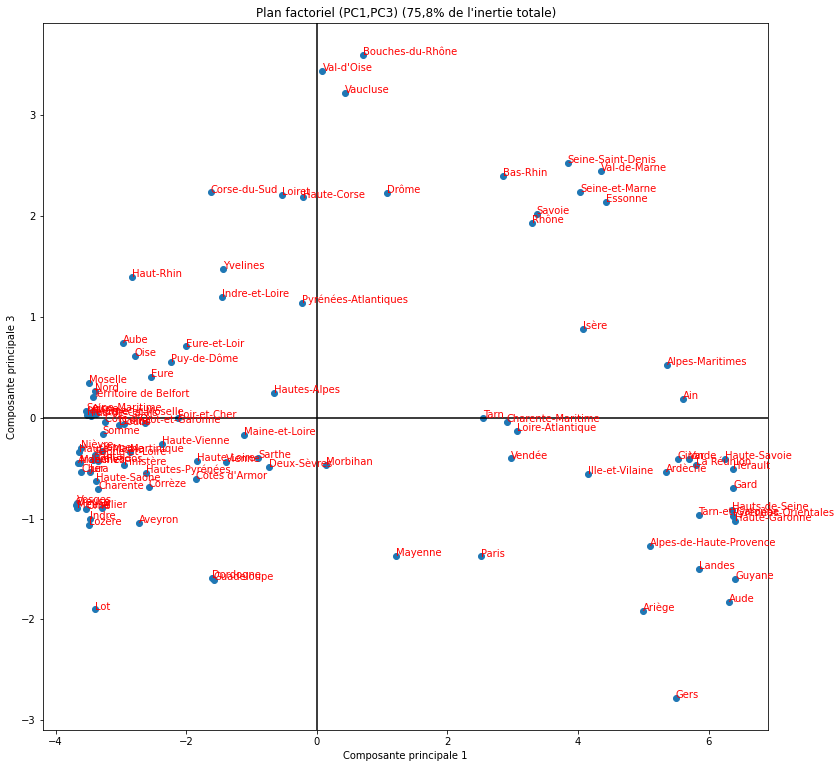

In [104]:
plot_PCA(X_pca,[0,2],departements,'Plan factoriel (PC1,PC3) (75,8% de l\'inertie totale)')

Ci-dessus figure la projection des départements sur le plan factoriel formé par la première et la troisième composante principale. Cette projection explique 75,8% de l'inertie totale.

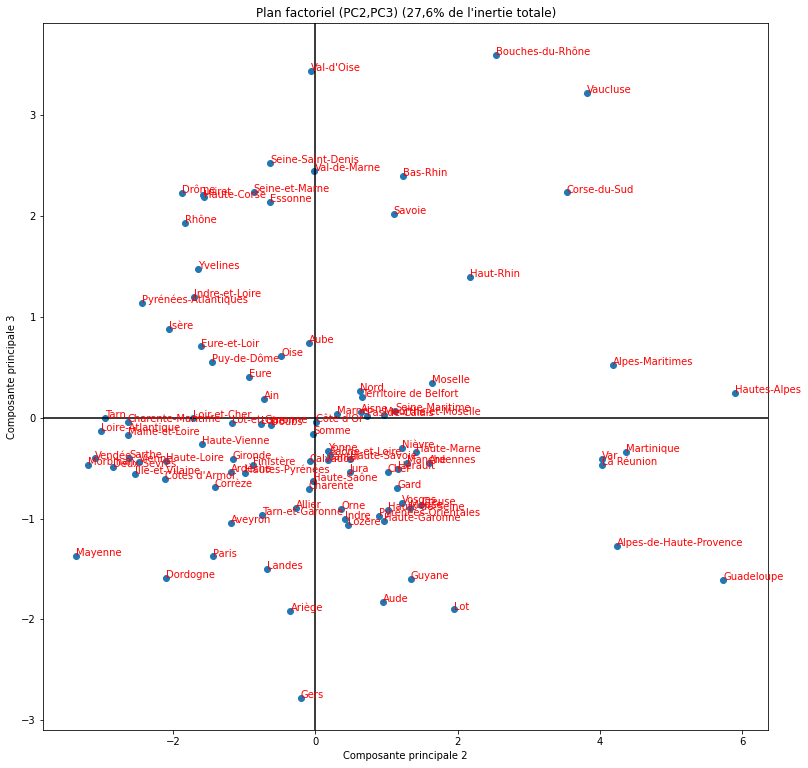

In [105]:
plot_PCA(X_pca,[1,2],departements,'Plan factoriel (PC2,PC3) (27,6% de l\'inertie totale)')

Ci-dessus figure la projection des départements sur le plan factoriel formé par la deuxième et la troisième composante principale. Cette projection explique 27,6% de l'inertie totale.

#### Application de la méthode des k-means sur l'espace formé par les 3 premières composantes principales (95,6% de l'inertie totale)

Nous allons effectuer un partionnement avec l'algorithme k-means de l'espace formé par les 3 premières composantes.

In [149]:
from sklearn.cluster import KMeans

#Nombre de clusters choisi pour l'algorithme de partionnement des k-means
nb_groups = 10

kmeans = KMeans(n_clusters=nb_groups,random_state=13)
kmeans.fit(X_pca[:,0:3])
groups = kmeans.predict(X_pca[:,0:3])

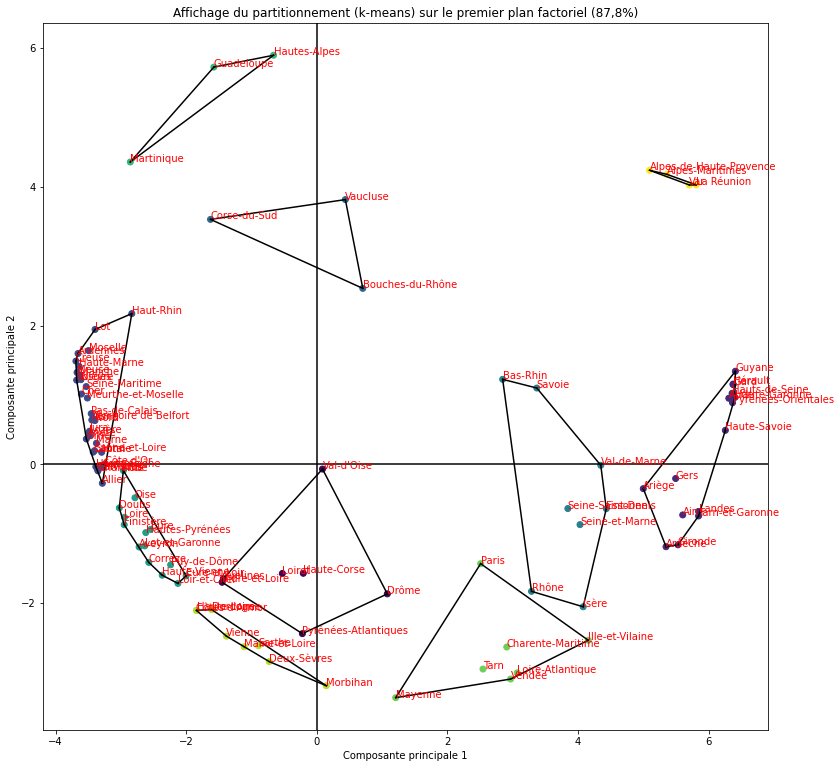

In [150]:
plot_PCA(X_pca,[0,1],departements,"Affichage du partitionnement (k-means) sur le premier plan factoriel (87,8%)",group=groups,polygon=True)

Ci-dessus figure l'affichage du partionnement sur le premier plan factoriel. Comme le premier plan factoriel contient 87% de l'inertie totale, le partionnement de l'espace formé par les 3 premières composantes regroupe des départements assez proches sur ce plan pour la plupart des classes.

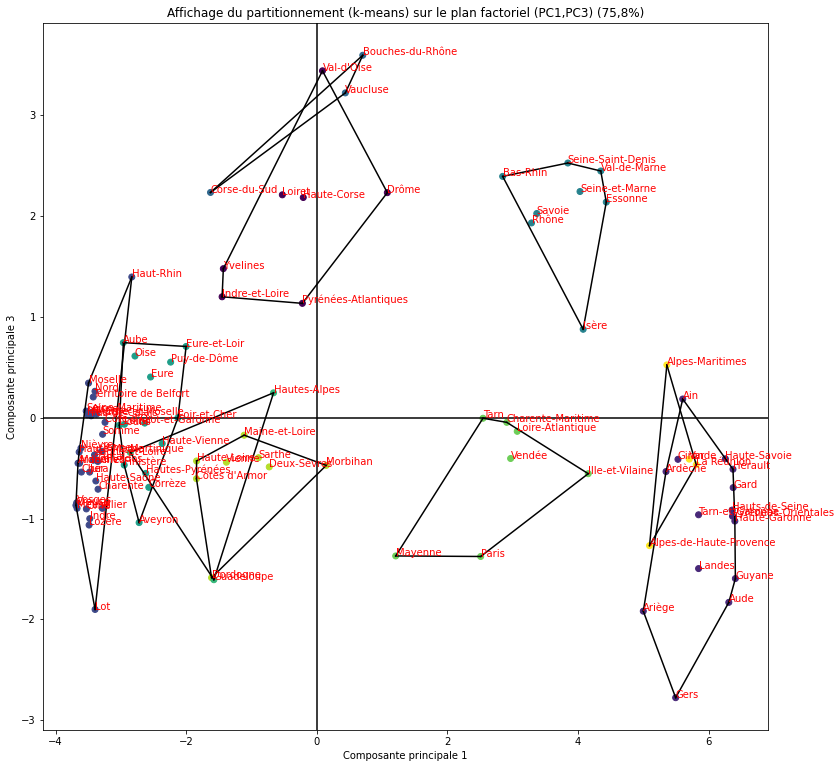

In [151]:
plot_PCA(X_pca,[0,2],departements,"Affichage du partitionnement (k-means) sur le plan factoriel (PC1,PC3) (75,8%)",group=groups,polygon=True)

Ci-dessus figure l'affichage du partionnement sur le plan factoriel formé par la première et la troisième composante principale. On remarque certains groupes conservent une inertie intra-classe faible relativement faible sur ce deuxième plan.

C'est le cas par exemple du groupe à gauche en violet (Moselle, Nord, Somme, Nièvre,Pas-de-Calais...). Ce groupe est représenté négativement par la première composante principale. Ces départements présentent un effectif en décroissance de 1994 à 2019 des élèves dans le second degré.

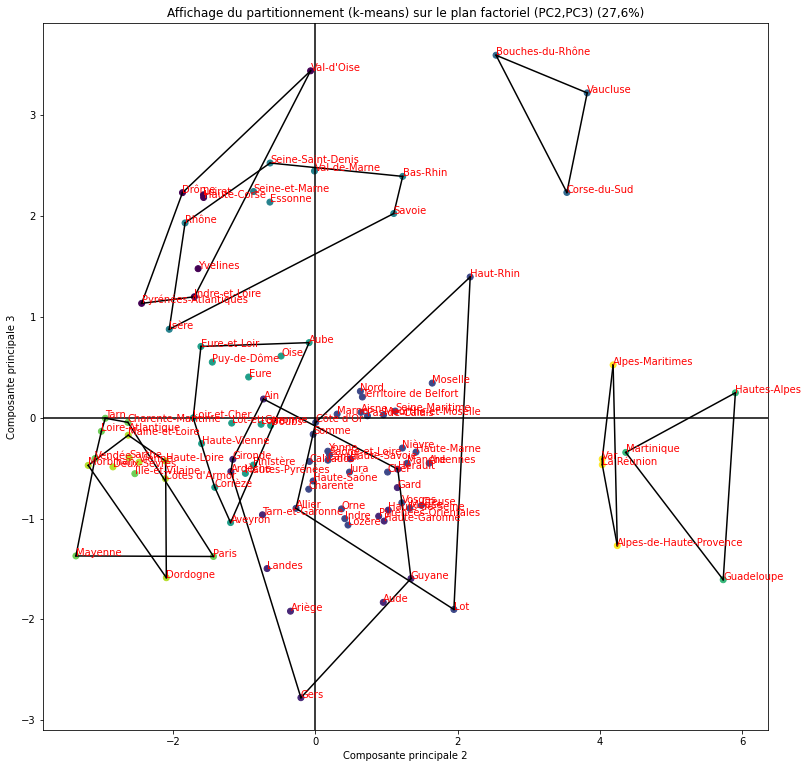

In [152]:
plot_PCA(X_pca,[1,2],departements,"Affichage du partitionnement (k-means) sur le plan factoriel (PC2,PC3) (27,6%)",group=groups,polygon=True)

Nous avons ci-dssous superposer les effectifs normalisés des départements dans chaque cluster obtenu avec la méthode des k-means. Nous commenterons les clusters retenus dans la partie "Partionnements retenus et interprétations" par la suite.

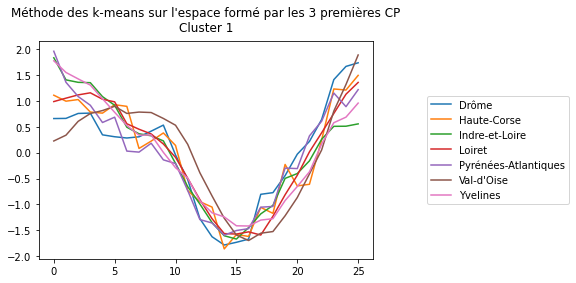

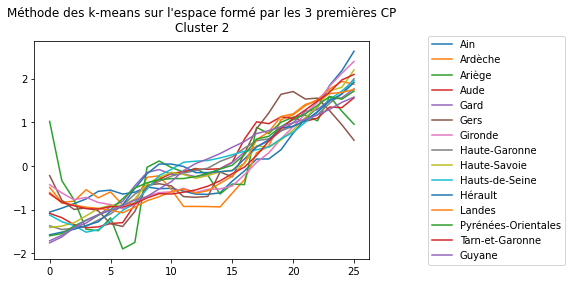

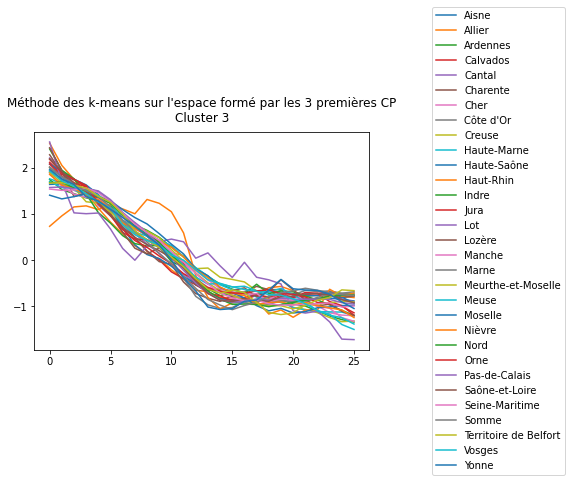

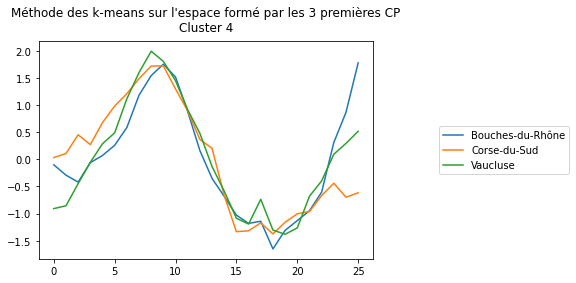

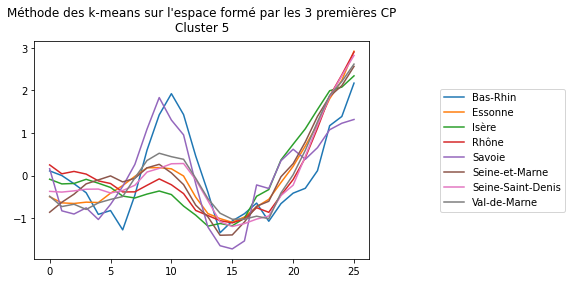

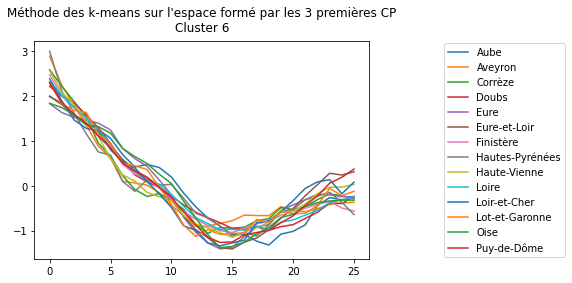

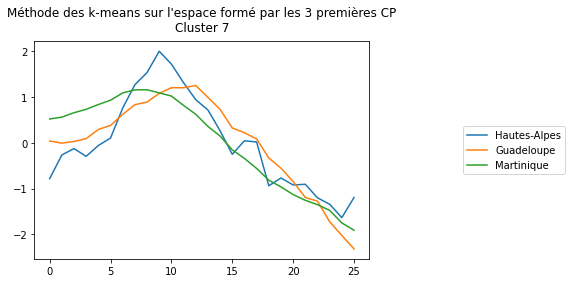

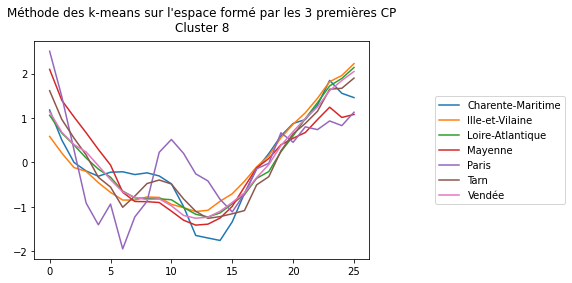

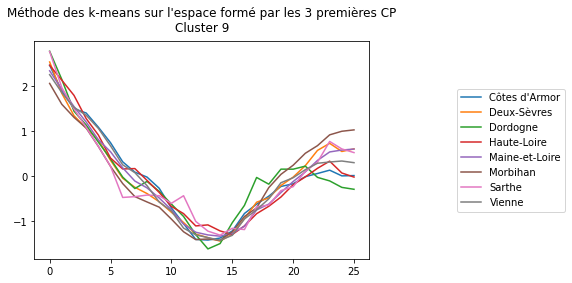

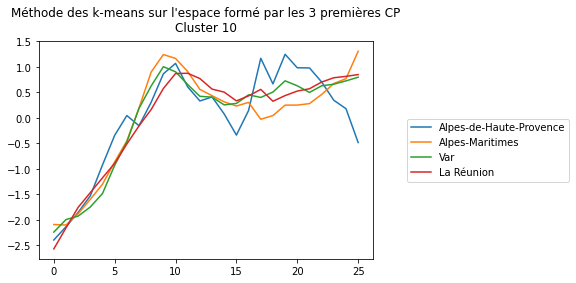

In [153]:
#Affichage des groupes obtenus par la méthode des k-means sur l'espace formé par les 3 premières dimensions
X_matrix = np.array(X)
for i in np.unique(groups):
    fig, ax = plt.subplots()
    plt.title("Méthode des k-means sur l\'espace formé par les 3 premières CP\n"+"Cluster "+str(i+1),pad=10)
    idx = np.where(groups==i)[0].tolist()
    for j in idx:
        plt.plot(X_matrix[j,:]) 
    
    plt.legend(departements[np.where(groups==i)[0].tolist()],loc='right',bbox_to_anchor=(1.6, 0.5))  

## Méthode mixte : Partionnement avec la méthode des k-means  + Classification ascendante hiérarchique

In [154]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

Nous avons pensé à utiliser la méthode de la classification ascendente hiérarchique pour tenter de partionner nos départements. Cepandant, pour rendre le partionnement plus robuste et maximiser l'intertie inter-classe, nous avons décidé de précéder la CAH par la méthode des k-means (méthode mixte).  

On commence par partionner en 40 clusters avec la méthode des k-means. On utilise l'ensemble des données (sans les projections de l'ACP).

In [169]:
## Méthode mixte

#Nombres de clusters choisis
nb_groups = 40

#Application de la méthode des k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=nb_groups,random_state=42)
kmeans.fit(X)
groups = kmeans.predict(X)

In [170]:
#Calcul des barycentres des clusters obtenus avec les k-means (poids égaux pour toutes les séries du groupe.)
X_matrix = np.array(X)
barycentres = np.empty(shape=(nb_groups,len(years)),dtype='object')

for i in list(np.unique(groups)):
    barycentres[i,:] = np.mean(X_matrix[np.where(groups==i)[0].tolist(),:],axis=0)

Après avoir calculé les barycentres de chaque clusters avec les mêmes poids pour chaque série du groupe, on applique la classification ascendente hiérarchique sur ces centres.

Nous utilisons la méthode du saut Ward ainsi que la distance euclidienne comme métrique pour la classification.

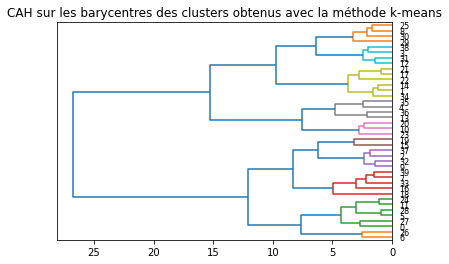

In [171]:
#CAH 
barycentres_linkage = linkage(barycentres,method='ward',metric='euclidean')
plt.title('CAH sur les barycentres des clusters obtenus avec la méthode k-means')
dendrogram(barycentres_linkage,orientation='left',color_threshold=6)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
groups2 = fcluster(barycentres_linkage,t=6,criterion='distance')
#index triés des groupes
idg = np.argsort(groups2)

Après avoir observé l'arbre, nous avons découpé l’arbre à une hauteur qui nous semblait judicieuse par rapport aux regroupements (ici à la hauteur 6). Avec ce découpage, nous obtenons 10 clusters. On a donc le classement suivant : 

In [172]:
#Réallocation des groupes obtenus avec la méthode de k-means
nb_groups2 = len(np.unique(groups2))
new_groups = groups.copy()

for i in range(0,len(groups2)):
    new_groups[np.where(groups==i)[0].tolist()] = groups2[i]

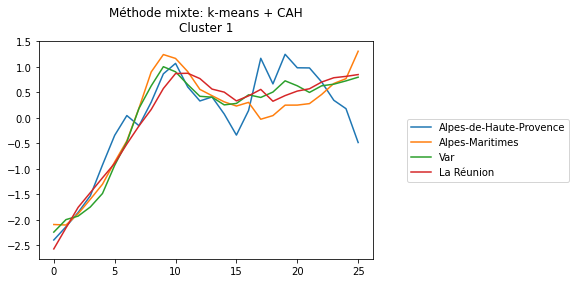

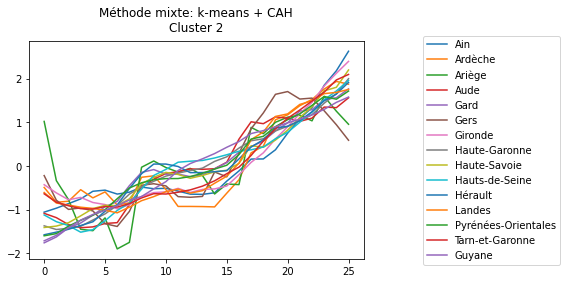

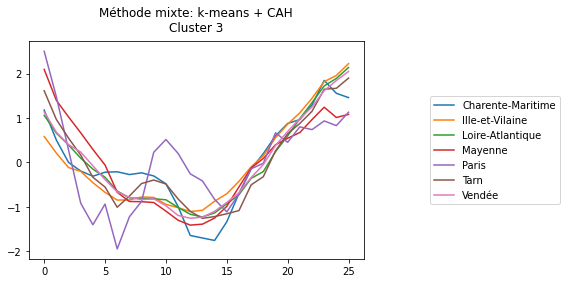

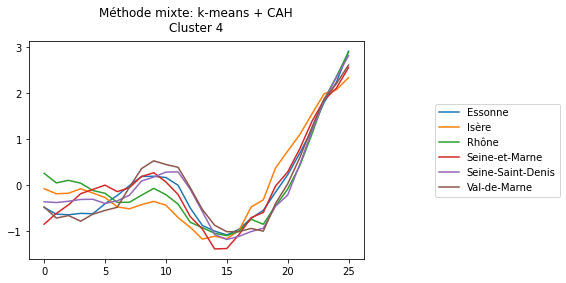

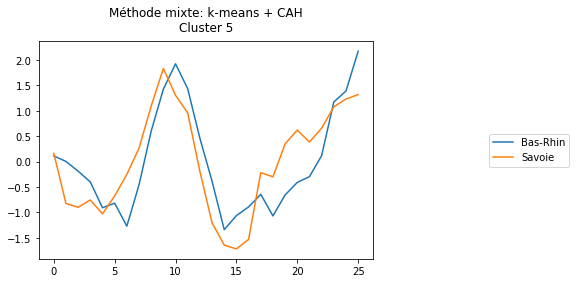

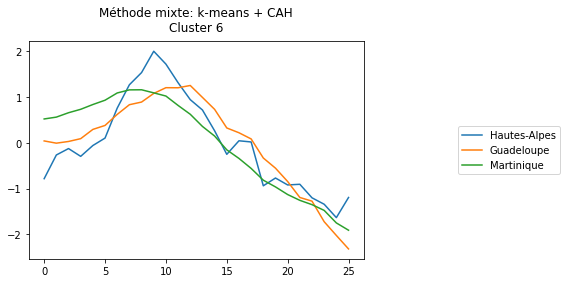

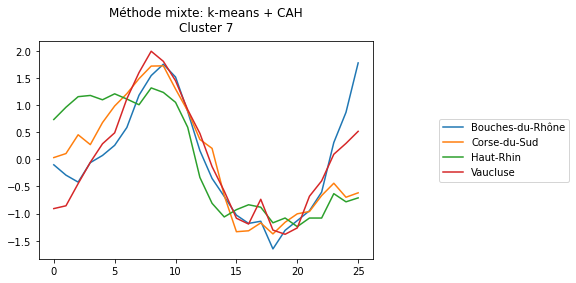

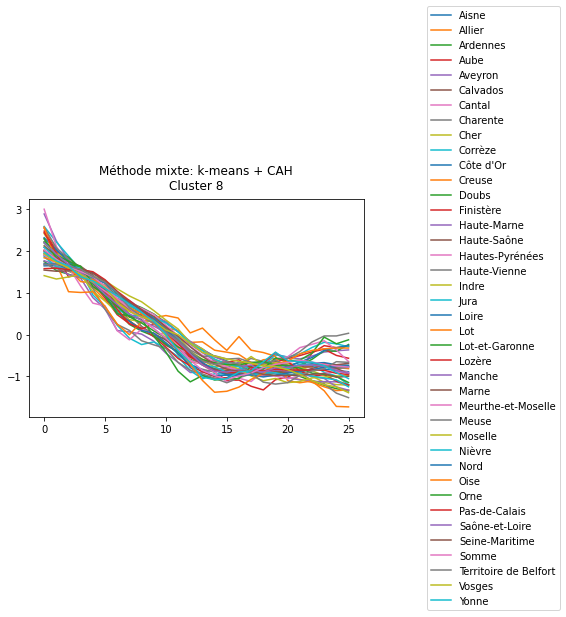

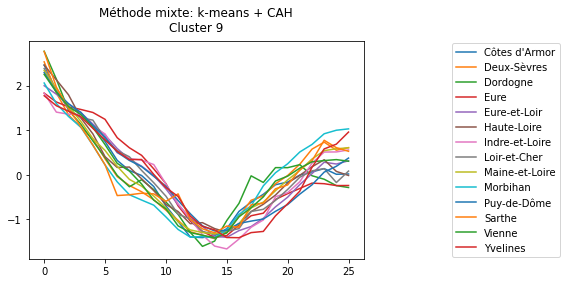

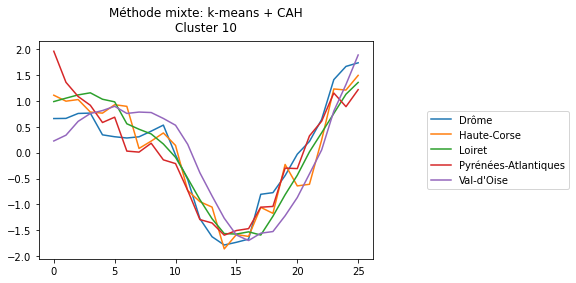

In [173]:
#Affichage des groupes obtenus par la méthode mixte
for i in np.unique(new_groups):
    fig, ax = plt.subplots()      
    plt.title("Méthode mixte: k-means + CAH\n"+"Cluster "+str(i),pad=10)

    idx = np.where(new_groups==i)[0].tolist()
    for j in idx:
        plt.plot(X_matrix[j,:]) 
    
    plt.legend(departements[np.where(new_groups==i)[0].tolist()],loc='right',bbox_to_anchor=(1.6, 0.5))  

On remarque que l'on obtient un partionnement similaire à celui obtenu avec l'analyse en composantes principales.

Ci-dessous, nous avons affiché le partionnement obtenu avec la méthode mixte sur le premier plan factoriel de l'ACP pour apprécier la cohérence entre les deux partionnements.

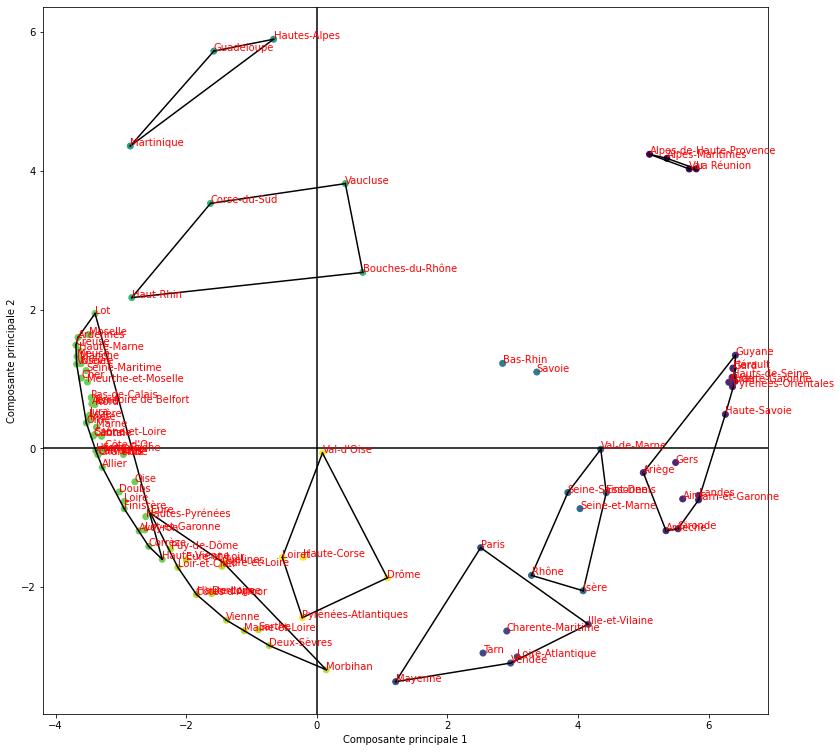

In [174]:
#Résultat de la classification par la méthode mixte affiché sur le premier plan factoriel 
plot_PCA(X_pca,[0,1],departements,group=new_groups,polygon=True)

On remarque que le partionnement avec la méthode mixte regroupe des points relativement proches sur le premier plan factoriel.

# Partitionnements retenus et interprétations

Après avoir observé les partionnements obtenus avec l'analyse en composantes principales et la méthode mixte, nous avons retenus 10 clusters pour les départements concernant l'évolution du nombre d'étudiants dans le second degré de 1994 à 2019.

Nous avons également trouver une base de données du nombre d'établissements du second degré par département de 2005 à 2020 sur le site de l'Education nationale.
Nous allons ainsi faire le lien entre ces évolutions et les évolutions du nombre d'élèves dans le second degré.

In [228]:
def plot_cluster(years,departements):
    """
    Fonction d'affichage de plusieurs séries temporelles sur la
    même figure
    """
    plt.title('Evolution normalisée du nombre d\'élèves dans le secondaire par département',pad=10)
    plt.xlabel("Années")
    for dpt in list(departements):
        plt.plot(years,X.loc[dpt].values)
        
    plt.legend(departements,loc='right',bbox_to_anchor=(1.6, 0.5))

In [329]:
#Importation des données du nombre d'établissement dans le second degré par département
raw_df = pd.read_csv('nombre-d-tablissements-du-second-degr--73831.csv',delimiter=';',)

#Pré-traitement des données
df = raw_df[['RENTREE SCOLAIRE', 'LIBELLE_GEOGRAPHIQUE','TYPE D\'ETABLISSEMENT','NOMBRE D\'ETABLISSEMENTS']]
df['LIBELLE_GEOGRAPHIQUE'] = df['LIBELLE_GEOGRAPHIQUE'].apply(lambda x: x.capitalize())


def plot_etablissement(df,years,departement):
    """
    Fonction pour afficher l'évolution du nombre d'établissements
    du second degré d'un département
    """
    plt.xlabel("Années")
    plt.title(departement,pad=10)
    t = df['NOMBRE D\'ETABLISSEMENTS']
    raw_y = t[np.where(df['LIBELLE_GEOGRAPHIQUE']==departement)[0].tolist()]
    years = np.unique(df['RENTREE SCOLAIRE'])

    y = np.empty(shape=(len(years)),dtype='object')

    for idx, val in enumerate(years):
        y[idx] = np.sum(t[np.where(np.array(df['RENTREE SCOLAIRE'] == val) & np.array(df['LIBELLE_GEOGRAPHIQUE'] == departement))[0].tolist()])

    return  plt.plot(years,y)


def plot_etablissements(df,years,ncols,departements):
    """
    Fonction pour afficher les évolutions du nombre d'établissements
    du second degré dans plusieurs départements
    """
    n = int(np.ceil(len(departements)/ncols))
    fig = plt.subplots(n, ncols,figsize=(18,3))
    plt.subplots_adjust(top=3)
    for i , dpt in enumerate(departements):
        plt.subplot(n, ncols, i+1)
        plot_etablissement(df,years,dpt)
        
    return fig

<ipython-input-329-f8b4d16e03f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIBELLE_GEOGRAPHIQUE'] = df['LIBELLE_GEOGRAPHIQUE'].apply(lambda x: x.capitalize())


**Cluster 1 : Var, Alpes-de-Haute-Provence, Alpes maritime, La Réunion**

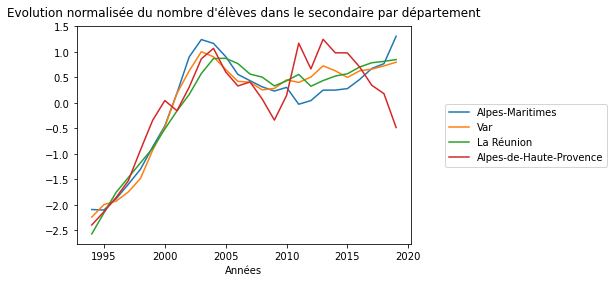

In [229]:
cluster1 = ['Alpes-Maritimes','Var','La Réunion','Alpes-de-Haute-Provence']
plot_cluster(years,cluster1)

Ces régions sont représentées positivement sur le premier (entre 5 & 6 en positif) et le deuxième axe (around 4). Ce cluster rassemble les régions ayant une croissance du nombre d’élèves jusqu’à 2000 (passant de -2,5 fois l’écart-type à 1,5 fois l’écart-type), suivie d’une évolution stable de l’ordre de 1 fois l’écart-type jusqu’à 2019. De plus, un pic entre 2003 et 2007 est observable.




**Cluster 2 : Ain, Ardèche, Aude, Gard, Gers, Gironde,
       Haute-Garonne, Haute-Savoie, Hauts-de-Seine, Hérault,
       Landes, Pyrénées-Orientales, Tarn-et-Garonne, Guyane** : 


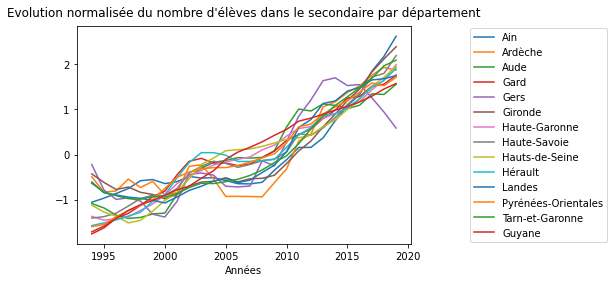

In [121]:
cluster2 = ['Ain', 'Ardèche', 'Aude', 'Gard', 'Gers', 'Gironde',
       'Haute-Garonne', 'Haute-Savoie', 'Hauts-de-Seine', 'Hérault',
       'Landes', 'Pyrénées-Orientales', 'Tarn-et-Garonne', 'Guyane']

plot_cluster(years,cluster2)

Ce cluster représente les individus ayant une augmentation stable sur la période 1994 à 2019 de l’ordre de -2 fois l’écart-type à +2 fois l’écart-type. Notons que le département de la Gironde, au cours de la période, a ouvert 12 établissements. Passant ainsi de 225 à 237. Ce phénomène s’est aussi reproduit en Guyane avec une ouverture de 18 établissements entre 1994 et 2019. Puis, 20 établissements pour le département de l’Hérault, 18 en Hauts-de-Seine et 10 en Haute-Garonne. Ainsi, ces phénomènes légitiment donc la formation de ce cluster.

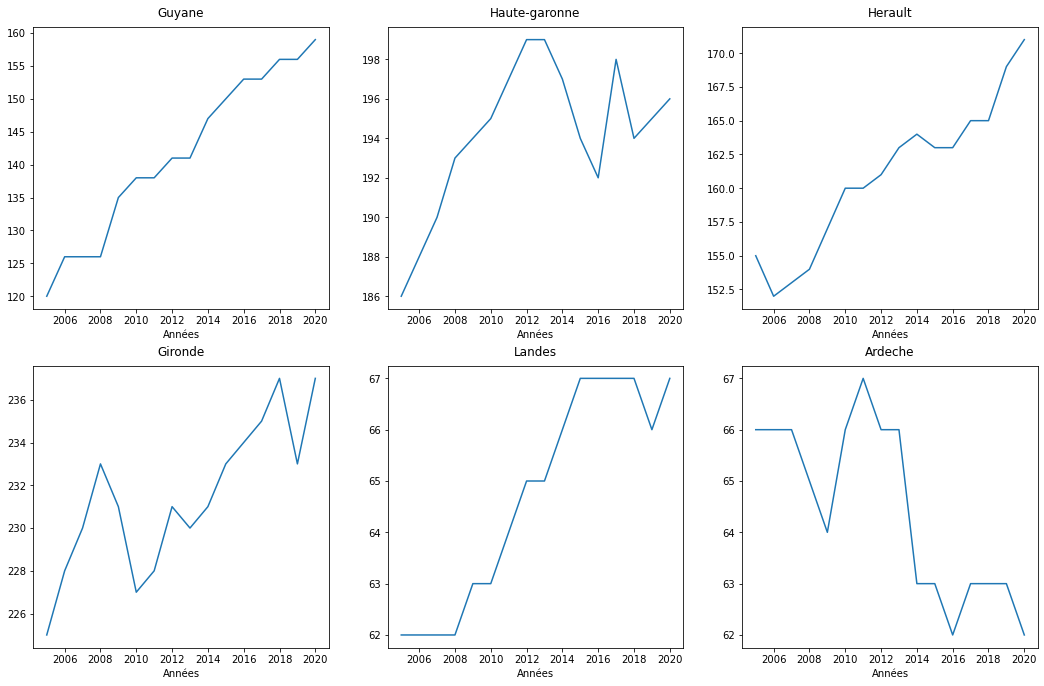

In [356]:
fig = plot_etablissements(df,years,3,['Guyane','Haute-garonne','Herault','Gironde','Landes','Ardeche'])

**Cluster 3 : Aisne, Allier, Ardennes, Aube, Calvados, Cantal, Charente, Cher, Côte d'Or, Creuse, Haute-Marne,
Haute-Saône, Indre, Jura, Lozère, Manche, Marne, Meurthe-et-Moselle, Meuse, Moselle, Nièvre, Nord,
Oise, Orne, Pas-de-Calais, Saône-et-Loire, Seine-Maritime, Somme, Territoire de Belfort, Vosges,
Yonne** : 

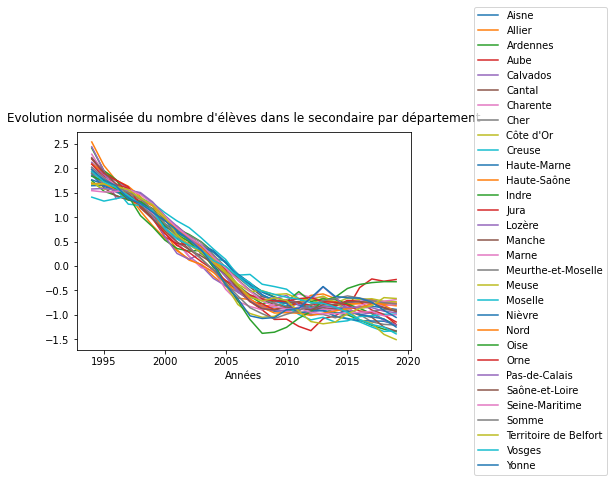

In [122]:
cluster3 = ['Aisne', 'Allier', 'Ardennes', 'Aube', 'Calvados', 'Cantal',
       'Charente', 'Cher', "Côte d'Or", 'Creuse', 'Haute-Marne',
       'Haute-Saône',  'Indre', 'Jura', 'Lozère',
       'Manche', 'Marne', 'Meurthe-et-Moselle', 'Meuse', 'Moselle',
       'Nièvre', 'Nord','Oise', 'Orne', 'Pas-de-Calais', 'Saône-et-Loire',
       'Seine-Maritime', 'Somme', 'Territoire de Belfort', 'Vosges',
       'Yonne']
plot_cluster(years,cluster3)

 Ce regroupe les départements ayant une diminution à peu près stable sur toute la période. Passant ainsi de +2 de l’écart-type à -2,5 de l’écart-type. En effet, le Nord a fermé 20 établissements scolaires sur la période 2005 à 2020. Le département de la Moselle est passé de 205 établissements en 2005 à 165 en 2019. Le Pas-de-Calais de 252 à 236 sur la même période. La Lozère de 32 à 25 établissements. La Meurthe-et-Moselle de 150 à 130 et 139 à 125 pour le département du Calvados.    

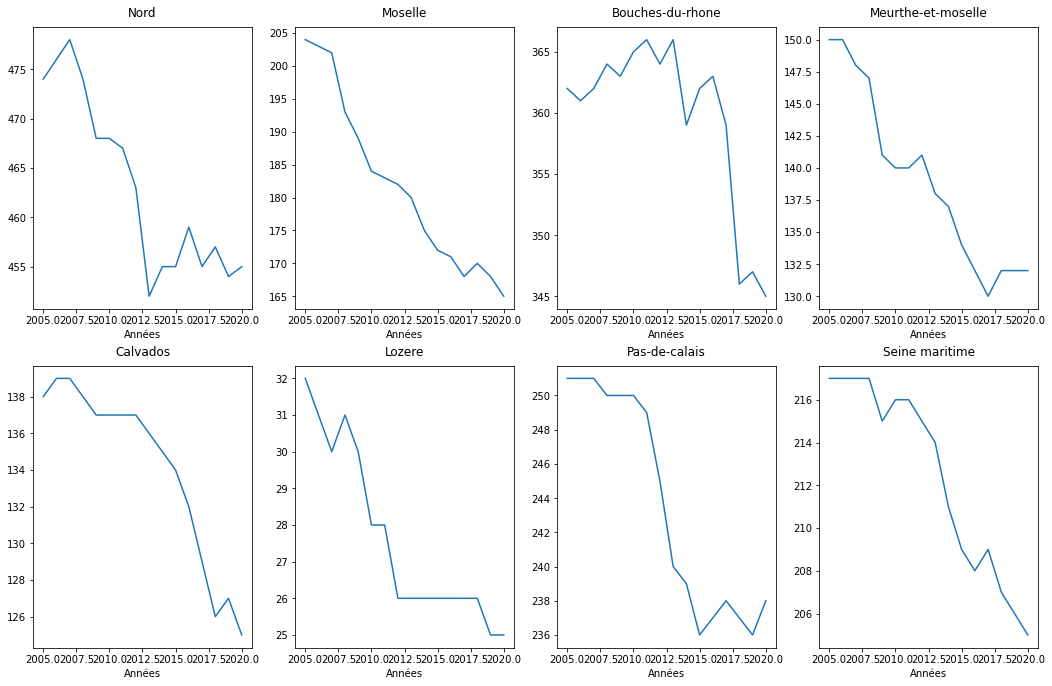

In [331]:
#Affichage de l'évolution du nombre d'établissements du second degré dans certains département
fig = plot_etablissements(df,years,4,['Nord','Moselle','Bouches-du-rhone','Meurthe-et-moselle',
                                    'Calvados','Lozere','Pas-de-calais','Seine maritime'])

**Cluster 4 : Côtes d'Armor, Deux-Sèvres, Dordogne, Haute-Loire, Maine-et-Loire, Morbihan, Sarthe, Vienne:** 

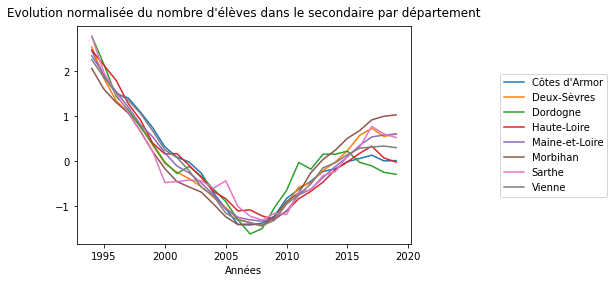

In [123]:
cluster4 =["Côtes d'Armor", 'Deux-Sèvres', 'Dordogne', 'Haute-Loire',
       'Maine-et-Loire', 'Morbihan', 'Sarthe', 'Vienne']
plot_cluster(years,cluster4)

Ce cluster traduit une forte décroissance du nombre d’élèves scolarisé dans le secondaire de 1994 à 2010 (passant de 3 fois écart-type de 3 à -1 fois l’écart-type), puis un ralentissement à partir de 2010 jusqu’à la fin de la période.

**Cluster 5 : Hautes-Alpes,Guadeloupe, Martinique :**

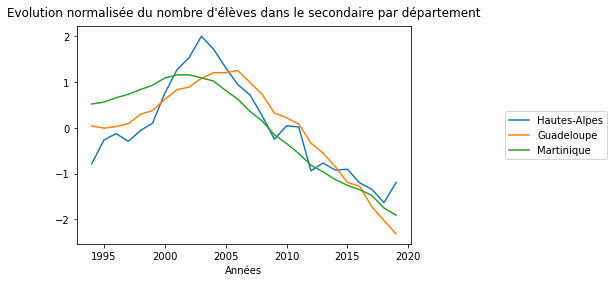

In [124]:
cluster5 = ['Hautes-Alpes', 'Guadeloupe', 'Martinique']

plot_cluster(years,cluster5)

Les départements regroupés dans ce cluster, ont constaté une augmentation de l’effectif de leur élèves du secondaire entre 2004 à 2003 - 2005 puis une diminution constante de l’ordre de 1,5 fois l’écart-type à -2,5 fois l’écart-type. En effet, entre 2005 et 2020, la Guadeloupe a fermé 6 établissements scolaires du secondaire.  La Martinique et les Hautes-Alpes

**Cluster 6 : Charente-Maritime, Ille-et-Vilaine, Isère, Loire-Atlantique, Mayenne, Tarn, Vendée :**

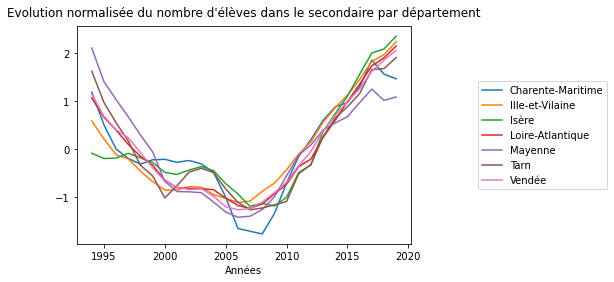

In [125]:
cluster6 = ['Charente-Maritime', 'Ille-et-Vilaine', 'Isère',
       'Loire-Atlantique', 'Mayenne', 'Tarn', 'Vendée']

plot_cluster(years,cluster6)

**Cluster 7 : Essonne, Rhône, Seine-et-Marne, Seine-Saint-Denis, Val-de-Marne**

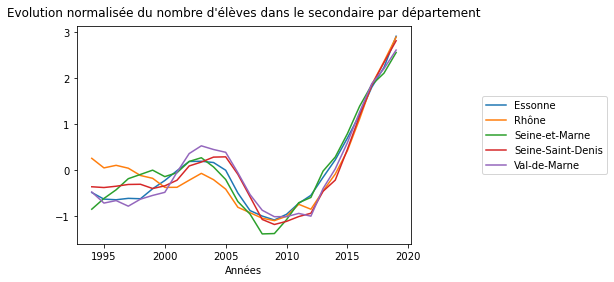

In [358]:
cluster7 = ['Essonne', 'Rhône', 'Seine-et-Marne', 'Seine-Saint-Denis',
       'Val-de-Marne']

plot_cluster(years,cluster7)

Ce cluster capture les départements ayant un creu dans le nombre d’élèves scolarisés dans le secondaire en 2010 - 2011 puis une augmentation du nombre d’élèves jusqu’à la fin de la période. En effet, le département de Seine-Saint-Denis a ouvert 30 établissements scolaire sur entre 2005 et 2019 et le Val-de-Marne en a ouvert 20 sur cette période.

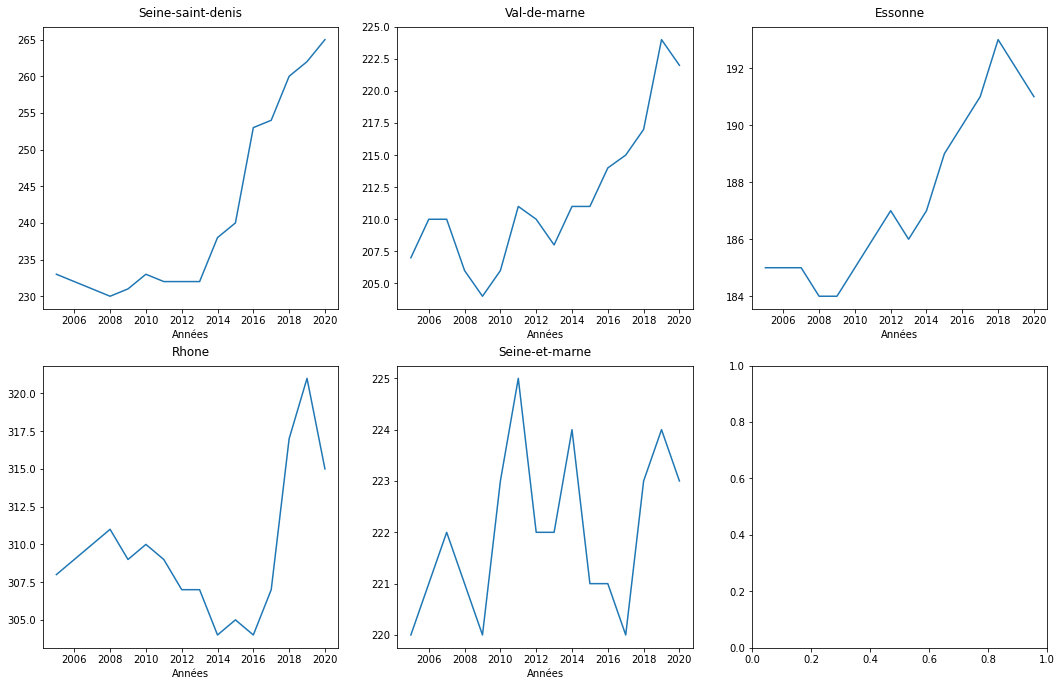

In [341]:
fig = plot_etablissements(df,years,3,['Seine-saint-denis','Val-de-marne','Essonne','Rhone','Seine-et-marne'])

**Cluster 8 : Bouches-du-Rhône, Corse-du-Sud, Vaucluse** 

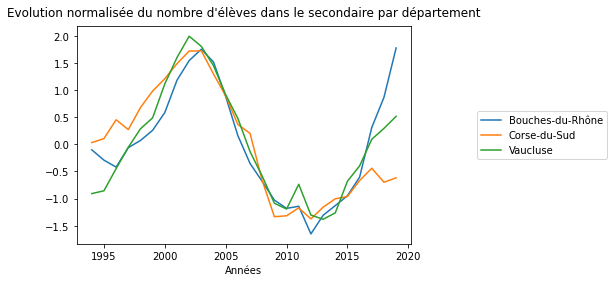

In [127]:
cluster8 = ['Bouches-du-Rhône', 'Corse-du-Sud', 'Vaucluse']
plot_cluster(years,cluster8)

Ce cluster regroupe le Bouches-du-Rhône, la Corse du Sud et la Vaucluss, soit des départements ayant eu une forte augmentation du nombre s'élèves dans le secondaire de l’ordre de 3 fois l’écart-type sur la période 1994 à 2000 - 2001 suivie d’une diminution jusqu'à 2010. Puis une forte reprise à partir de 2010 jusqu'à la fin de la période.    

**Cluster 9 : Ariège, Paris:**

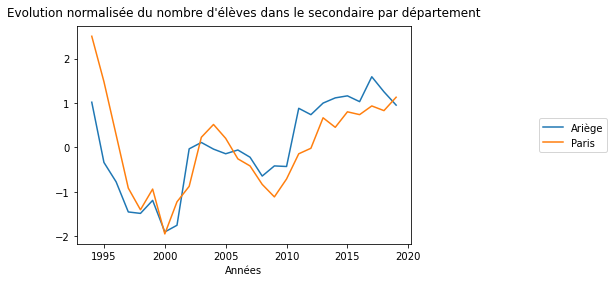

In [128]:
cluster9 = ['Ariège', 'Paris']
plot_cluster(years,cluster9)

Ces deux départements sont regroupés dans un même cluster et sont à la fois deux départements qui sont difficilement regroupable. Ces derniers partagent une casi-similaire évolution. Une diminution du nombre d'élèves du début de la période jusqu'à 2000 (passant de 2,5 fois l'écart-type à -2,6 fois l'écart-type) puis une reprise de 2000 à 2005. Ensuite une rechute de l'effectif jusqu'aux années 2008 - 2010, suivie pour finir d'une augmentation stable jusqu'en fin de période.  

Suite à la crise des subprime qui a fortement affecté Paris et ses prix immobilier, certain personnes ont dû quitter la région pour s’installer dans la banlieue parisienne. Ainsi, ils bénéficient d’un lieu de logement à la fois moins cher que sur Paris mais aussi proche de leur lieu de travail. Cela expliquerai notamment la fluctuation du nombre d’élèves scolarisé dans le secondaire. De plus, le prix des logements parisiens fluctuent beaucoup.  

**Cluster 10 : Loiret, Haute-Corse, Drôme, Pyrénées-Atlantiques, Val-d\'Oise**

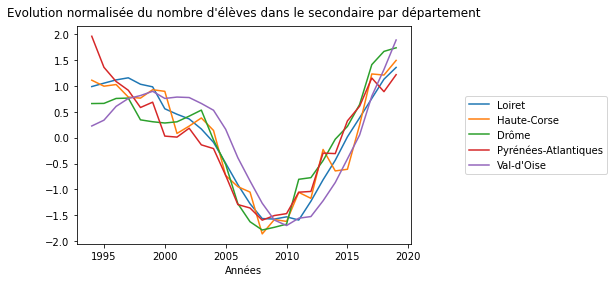

In [129]:
cluster10 = ['Loiret', 'Haute-Corse','Drôme','Pyrénées-Atlantiques','Val-d\'Oise']
plot_cluster(years,cluster10)

On remarque deux temps sur cette periode. En effet, les département du Loiret, de la Haute-Corse, du Drôme, des Pyrénées-Atlantiques et du Val d'Oise ont eu une forte diminution du nombre d'étudiants entre 1994 et 2008 (1,5 fois l'écart-type à -1,5 fois l'écart-type) puis un très fort fort réhaussement (-1,5 fois l'écart-type à 1,5 fois l'écart-type) de ce nombre sur la seconde période (2010 à 2019).

In [130]:
Mayotte
#Cluster 7 ?

1994         NaN
1995         NaN
1996         NaN
1997         NaN
1998         NaN
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011   -1.599226
2012   -1.080111
2013   -0.805501
2014   -0.432438
2015   -0.032727
2016    0.465436
2017    0.869215
2018    1.154809
2019    1.460542
Name: Mayotte, dtype: float64

In [131]:
biplot(score=X_pca_inv[:,0:2],coeff=np.transpose(pca_inv.components_[0:2]),years=departements)
plt.show()

NameError: name 'X_pca_inv' is not defined